In [95]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import datetime
import numpy as np




Setup Complete


In [96]:
data = pd.read_csv('trustpilot_reviews.csv')
#data gathered Friday, February 25, 2022
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12467 entries, 0 to 12466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row             12467 non-null  int64  
 1   Business Name   12467 non-null  object 
 2   Average Rating  12467 non-null  float64
 3   Review Grade    12467 non-null  object 
 4   Title           12467 non-null  object 
 5   Review          12467 non-null  object 
 6   Rating          12467 non-null  int64  
 7   Time            12467 non-null  object 
 8   Review Count    12467 non-null  int64  
 9   Country         12466 non-null  object 
 10  Status          12467 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.0+ MB


In [97]:
duplicate = data[data.duplicated(['Business Name', 'Title', 'Review', 'Rating', 'Time', 'Review Count', 'Country', 'Status'], keep = 'first')]
duplicate

,Row,Business Name,Average Rating,Review Grade,Title,Review,Rating,Time,Review Count,Country,Status
1587,1587,PLDT,1.1,Bad,"PLDT, the Destroyer of Mental Health",The handlers of this stupid trash ISP are corr...,1,4 days ago,1,PH,[BLANK]
1588,1588,PLDT,1.1,Bad,PLDT fix your wifi its actually very…,PLDT fix your wifi its actually very slow when...,1,4 days ago,1,PH,[BLANK]
1589,1589,PLDT,1.1,Bad,PLDT IS A MISTAKE IN THIS EARTH,This internet is no. 1 in crappiness! I am com...,1,4 days ago,1,PH,[BLANK]
1590,1590,PLDT,1.1,Bad,",fix your goddamn internet.",[BLANK],1,6 days ago,1,PH,[BLANK]
1591,1591,PLDT,1.1,Bad,BRUH FOR THE PAST YEAR PLDT IS VERY…,BRUH FOR THE PAST YEAR PLDT IS VERY SLOW IM SO...,1,6 days ago,1,PH,[BLANK]
...,...,...,...,...,...,...,...,...,...,...,...
10895,10895,Lazada,1.5,Bad,Lazada will never come close to Amazon,I have ordered many things from Lazada. I am ...,3,21-Dec-15,1,US,[BLANK]
10896,10896,Lazada,1.5,Bad,fast delivery and nice items,I ordered a lot of items thru lazada and so fa...,4,24-Nov-15,2,US,[BLANK]
10897,10897,Lazada,1.5,Bad,Not as good as Amazon but not terrible like Al...,All (25+) orders have been received in good co...,3,11-Nov-15,5,US,[BLANK]
12001,12001,PNXBET,4.8,Excellent,Nice betting site,[BLANK],5,19-Mar-20,1,PH,[BLANK]


In [98]:
cleaned_data = data.drop_duplicates(subset=['Business Name', 'Title', 'Review', 'Rating', 'Time', 'Review Count', 'Country', 'Status'], keep = 'first')

In [99]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 0 to 12466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row             10916 non-null  int64  
 1   Business Name   10916 non-null  object 
 2   Average Rating  10916 non-null  float64
 3   Review Grade    10916 non-null  object 
 4   Title           10916 non-null  object 
 5   Review          10916 non-null  object 
 6   Rating          10916 non-null  int64  
 7   Time            10916 non-null  object 
 8   Review Count    10916 non-null  int64  
 9   Country         10915 non-null  object 
 10  Status          10916 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1023.4+ KB


In [100]:
month = []

for row in cleaned_data['Time']:
    if 'ago' in row:
        row = 'Feb'
        month.append(row)
    elif 'Updated' not in row:
        if '-' in row:
            month.append(row.split('-')[1])
            #print('')
        else:
            month.append(row.split('.')[0])
            #print('')
    else:
        if row.split(' ')[1].isdigit():
            month.append(row.split(' ')[2])
            #print('')
        else:
            month.append(row.split(' ')[1].replace('.',''))
            #print('')
print(len(month))

10916


In [101]:
#cleaned_data['Month'] = month



#cleaned_data.info()


#len(np.unique(month))

for i in month:
    if i == 'July':
        month[month.index(i)] = 'Jul'
    elif i == 'June':
        month[month.index(i)] = 'Jun'
    elif i == 'Sept':
        month[month.index(i)] = 'Sep'
        
np.unique(month)

len(month)
cleaned_data['Month'] = month

<ipython-input-101-72c841560690>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month'] = month


In [102]:
cleaned_data.info()

month_numbers = []

for i in month:
    if i == 'Jan':
        month_numbers.append(1)
    elif i == 'Feb':
        month_numbers.append(2)
    elif i == 'Mar':
        month_numbers.append(3)
    elif i == 'Apr':
        month_numbers.append(4)
    elif i == 'May':
        month_numbers.append(5)
    elif i == 'Jun':
        month_numbers.append(6)
    elif i == 'Jul':
        month_numbers.append(7)
    elif i == 'Aug':
        month_numbers.append(8)
    elif i == 'Sep':
        month_numbers.append(9)
    elif i == 'Oct':
        month_numbers.append(10)
    elif i == 'Nov':
        month_numbers.append(11)
    else:
        month_numbers.append(12)
        
print(len(month_numbers))
#print(len(month_numbers))
#cleaned_data['Month Numbers'] = month_numbers
#sns.lineplot(data=cleaned_data)

cleaned_data['Month Numbers'] = month_numbers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 0 to 12466
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row             10916 non-null  int64  
 1   Business Name   10916 non-null  object 
 2   Average Rating  10916 non-null  float64
 3   Review Grade    10916 non-null  object 
 4   Title           10916 non-null  object 
 5   Review          10916 non-null  object 
 6   Rating          10916 non-null  int64  
 7   Time            10916 non-null  object 
 8   Review Count    10916 non-null  int64  
 9   Country         10915 non-null  object 
 10  Status          10916 non-null  object 
 11  Month           10916 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.1+ MB
10916


<ipython-input-102-7725bc84d0cb>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month Numbers'] = month_numbers


In [103]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 0 to 12466
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row             10916 non-null  int64  
 1   Business Name   10916 non-null  object 
 2   Average Rating  10916 non-null  float64
 3   Review Grade    10916 non-null  object 
 4   Title           10916 non-null  object 
 5   Review          10916 non-null  object 
 6   Rating          10916 non-null  int64  
 7   Time            10916 non-null  object 
 8   Review Count    10916 non-null  int64  
 9   Country         10915 non-null  object 
 10  Status          10916 non-null  object 
 11  Month           10916 non-null  object 
 12  Month Numbers   10916 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [104]:
#data gathered Friday, February 25, 2022

exact_date = []
for row in cleaned_data['Time']:
    if 'days' in row:
        for elements in row.split(' '):
            if elements.isdigit():
                exact_date.append("{}-Feb-22".format(25-int(elements)))
    else:
        exact_date.append(row)
        
for i in cleaned_data['Time']:
    print(i)


25-Jan-22
23-Aug-21
Updated 21 Jul 2021
21-Jul-21
16-Jun-21
5-Jun-21
5-Jun-21
Updated 1 Jun 2021
28-May-21
26-May-21
5-May-21
3-May-21
27-Apr-21
26-Apr-21
21-Apr-21
14-Apr-21
14-Apr-21
6-Apr-21
22-Mar-21
21-Mar-21
10-Mar-21
5-Mar-21
4-Mar-21
Updated 3 Mar 2021
24-Feb-21
18-Feb-21
18-Feb-21
15-Feb-21
15-Feb-21
11-Feb-21
9-Feb-21
8-Feb-21
5-Feb-21
Updated 11 Feb 2021
22-Jan-21
13-Jan-21
27-Dec-20
22-Dec-20
15-Dec-20
14-Dec-20
14-Dec-20
10-Dec-20
9-Dec-20
7-Dec-20
7-Dec-20
30-Nov-20
27-Nov-20
19-Nov-20
14-Nov-20
9-Nov-20
26-Oct-20
22-Oct-20
19-Oct-20
16-Oct-20
15-Oct-20
13-Oct-20
12-Oct-20
12-Oct-20
9-Oct-20
6-Oct-20
6-Oct-20
3-Oct-20
1-Oct-20
1-Oct-20
1-Oct-20
30-Sep-20
27-Sep-20
25-Sep-20
25-Sep-20
25-Sep-20
24-Sep-20
21-Sep-20
14-Sep-20
7-Sep-20
7-Aug-20
4-Aug-20
16-Jul-20
14-Jul-20
8-Jul-20
6-Jul-20
2-Jul-20
29-Jun-20
18-Jun-20
18-Jun-20
16-Jun-20
11-Jun-20
4-Jun-20
14-May-20
30-Apr-20
23-Apr-20
22-Apr-20
17-Apr-20
18-Mar-20
13-Mar-20
11-Mar-20
10-Mar-20
10-Mar-20
9-Mar-20
3-Mar-20
24

11-Jun-20
11-Jun-20
11-Jun-20
10-Jun-20
9-Jun-20
9-Jun-20
9-Jun-20
7-Jun-20
6-Jun-20
4-Jun-20
4-Jun-20
4-Jun-20
4-Jun-20
4-Jun-20
4-Jun-20
3-Jun-20
3-Jun-20
3-Jun-20
2-Jun-20
2-Jun-20
2-Jun-20
1-Jun-20
1-Jun-20
1-Jun-20
30-May-20
28-May-20
28-May-20
27-May-20
27-May-20
27-May-20
26-May-20
21-May-20
3-May-20
19-Apr-20
9-Apr-20
31-Mar-20
30-Mar-20
29-Mar-20
26-Mar-20
21-Mar-20
20-Mar-20
19-Mar-20
18-Mar-20
17-Mar-20
16-Mar-20
15-Mar-20
15-Mar-20
15-Mar-20
15-Mar-20
14-Mar-20
14-Mar-20
14-Mar-20
14-Mar-20
13-Mar-20
13-Mar-20
13-Mar-20
13-Mar-20
13-Mar-20
13-Mar-20
13-Mar-20
13-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
12-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11-Mar-20
11

9-Sep-20
8-Sep-20
7-Sep-20
5-Sep-20
1-Sep-20
27-Aug-20
26-Aug-20
25-Aug-20
24-Aug-20
24-Aug-20
24-Aug-20
24-Aug-20
23-Aug-20
19-Aug-20
18-Aug-20
17-Aug-20
17-Aug-20
16-Aug-20
16-Aug-20
Updated 12 Aug 2020
Updated 6 Sept 2020
4-Aug-20
2-Aug-20
2-Aug-20
1-Aug-20
30-Jul-20
29-Jul-20
28-Jul-20
27-Jul-20
26-Jul-20
22-Jul-20
20-Jul-20
19-Jul-20
18-Jul-20
16-Jul-20
16-Jul-20
Updated 15 Jul 2020
Updated 15 Jul 2020
Updated 30 Jul 2020
14-Jul-20
12-Jul-20
10-Jul-20
10-Jul-20
Updated 24 Jul 2020
6-Jul-20
6-Jul-20
5-Jul-20
2-Jul-20
1-Jul-20
Updated 30 Jun 2020
29-Jun-20
24-Jun-20
24-Jun-20
Updated 7 Jul 2020
22-Jun-20
20-Jun-20
Updated 19 Jun 2020
19-Jun-20
16-Jun-20
Updated 15 Jun 2020
Updated 15 Jun 2020
15-Jun-20
Updated 13 Jun 2020
12-Jun-20
12-Jun-20
11-Jun-20
11-Jun-20
11-Jun-20
10-Jun-20
9-Jun-20
8-Jun-20
4-Jun-20
3-Jun-20
2-Jun-20
28-May-20
20-May-20
Updated 13 Aug 2021
Updated 19 May 2020
11-May-20
3-May-20
1-May-20
20-Apr-20
19-Apr-20
7-Apr-20
5-Apr-20
2-Apr-20
Updated 28 Mar 2020
18-Ma

14-Sep-21
14-Sep-21
14-Sep-21
12-Sep-21
11-Sep-21
10-Sep-21
9-Sep-21
9-Sep-21
8-Sep-21
7-Sep-21
7-Sep-21
Updated Sep 6, 2021
29-Aug-21
29-Aug-21
27-Aug-21
27-Aug-21
26-Aug-21
25-Aug-21
25-Aug-21
24-Aug-21
20-Aug-21
19-Aug-21
16-Aug-21
12-Aug-21
12-Aug-21
11-Aug-21
9-Aug-21
9-Aug-21
Updated Aug 7, 2021
6-Aug-21
5-Aug-21
3-Aug-21
3-Aug-21
31-Jul-21
26-Jul-21
22-Jul-21
22-Jul-21
22-Jul-21
21-Jul-21
20-Jul-21
Updated Jul 19, 2021
Updated Jul 20, 2021
16-Jul-21
16-Jul-21
15-Jul-21
15-Jul-21
15-Jul-21
14-Jul-21
14-Jul-21
13-Jul-21
12-Jul-21
12-Jul-21
12-Jul-21
12-Jul-21
9-Jul-21
9-Jul-21
8-Jul-21
8-Jul-21
8-Jul-21
7-Jul-21
7-Jul-21
6-Jul-21
6-Jul-21
5-Jul-21
4-Jul-21
3-Jul-21
3-Jul-21
3-Jul-21
2-Jul-21
1-Jul-21
30-Jun-21
29-Jun-21
26-Jun-21
26-Jun-21
25-Jun-21
22-Jun-21
18-Jun-21
12-Jun-21
11-Jun-21
11-Jun-21
Updated Jun 9, 2021
8-Jun-21
7-Jun-21
Updated Jun 7, 2021
7-Jun-21
7-Jun-21
5-Jun-21
4-Jun-21
3-Jun-21
3-Jun-21
1-Jun-21
30-May-21
29-May-21
27-May-21
26-May-21
25-May-21
25-May-21
23-M

18-Oct-18
17-Oct-18
Updated Oct 16, 2018
16-Oct-18
16-Oct-18
16-Oct-18
15-Oct-18
15-Oct-18
15-Oct-18
13-Oct-18
12-Oct-18
12-Oct-18
11-Oct-18
11-Oct-18
11-Oct-18
10-Oct-18
10-Oct-18
10-Oct-18
10-Oct-18
9-Oct-18
9-Oct-18
8-Oct-18
8-Oct-18
6-Oct-18
6-Oct-18
6-Oct-18
6-Oct-18
5-Oct-18
5-Oct-18
5-Oct-18
4-Oct-18
4-Oct-18
4-Oct-18
4-Oct-18
3-Oct-18
3-Oct-18
2-Oct-18
2-Oct-18
1-Oct-18
30-Sep-18
30-Sep-18
29-Sep-18
28-Sep-18
28-Sep-18
28-Sep-18
28-Sep-18
Updated Sep 28, 2018
27-Sep-18
27-Sep-18
26-Sep-18
26-Sep-18
26-Sep-18
26-Sep-18
25-Sep-18
24-Sep-18
24-Sep-18
24-Sep-18
24-Sep-18
Updated Sep 23, 2018
23-Sep-18
Updated Sep 22, 2018
22-Sep-18
21-Sep-18
21-Sep-18
21-Sep-18
21-Sep-18
20-Sep-18
19-Sep-18
19-Sep-18
18-Sep-18
18-Sep-18
18-Sep-18
17-Sep-18
17-Sep-18
17-Sep-18
15-Sep-18
15-Sep-18
14-Sep-18
13-Sep-18
12-Sep-18
12-Sep-18
11-Sep-18
10-Sep-18
9-Sep-18
9-Sep-18
9-Sep-18
8-Sep-18
Updated Sep 6, 2018
6-Sep-18
6-Sep-18
6-Sep-18
6-Sep-18
5-Sep-18
Updated Sep 6, 2018
5-Sep-18
5-Sep-18
5-Sep-1

A day ago
2 days ago
3 days ago
3 days ago
4 days ago
5 days ago
6 days ago
6 days ago
6 days ago
6 days ago
7 days ago
18-Feb-22
18-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
17-Feb-22
16-Feb-22
16-Feb-22
16-Feb-22
Updated Feb 16, 2022
16-Feb-22
15-Feb-22
15-Feb-22
15-Feb-22
Updated Feb 15, 2022
15-Feb-22
15-Feb-22
15-Feb-22
15-Feb-22
Updated Feb 15, 2022
15-Feb-22
14-Feb-22
Updated Feb 16, 2022
14-Feb-22
14-Feb-22
14-Feb-22
Updated Feb 14, 2022
Updated Feb 14, 2022
14-Feb-22
14-Feb-22
14-Feb-22
14-Feb-22
14-Feb-22
14-Feb-22
14-Feb-22
14-Feb-22
14-Feb-22
Updated Feb 14, 2022
Updated Feb 13, 2022
12-Feb-22
12-Feb-22
7-Feb-22
6-Feb-22
4-Feb-22
2-Feb-22
25-Jan-22
20-Jan-22
16-Jan-22
15-Jan-22
9-Jan-22
3-Jan-22
30-Dec-21
29-Dec-21
29-Dec-21
28-Dec-21
26-Dec-21
22-Dec-21
21-Dec-21
20-Dec-21
17-Dec-21
17-Dec-21
14-Dec-21
13-Dec-21
12-Dec-21
11-Dec-21
10-Dec-21
9-Dec-21
8-Dec-21
7-Dec-21
5-Dec-21
28-Nov-21
27-Nov-21
25-Nov-21
16

8-Jul-19
7-Jul-19
Updated Jul 6, 2019
4-Jul-19
2-Jul-19
2-Jul-19
1-Jul-19
1-Jul-19
1-Jul-19
1-Jul-19
1-Jul-19
Updated Jun 23, 2019
21-Jun-19
12-Jun-19
9-Jun-19
8-Jun-19
5-Jun-19
3-Jun-19
3-Jun-19
3-Jun-19
2-Jun-19
2-Jun-19
2-Jun-19
Updated Jun 2, 2019
1-Jun-19
1-Jun-19
1-Jun-19
1-Jun-19
1-Jun-19
30-May-19
30-May-19
24-May-19
19-May-19
14-May-19
14-May-19
Updated May 12, 2019
12-May-19
6-May-19
6-May-19
Updated May 2, 2019
2-May-19
1-May-19
1-May-19
1-May-19
25-Apr-19
23-Apr-19
14-Apr-19
13-Apr-19
12-Apr-19
11-Apr-19
9-Apr-19
7-Apr-19
4-Apr-19
2-Apr-19
2-Apr-19
1-Apr-19
1-Apr-19
1-Apr-19
27-Mar-19
26-Mar-19
25-Mar-19
23-Mar-19
22-Mar-19
22-Mar-19
8-Mar-19
8-Mar-19
8-Mar-19
7-Mar-19
7-Mar-19
7-Mar-19
7-Mar-19
7-Mar-19
6-Mar-19
3-Mar-19
2-Mar-19
1-Mar-19
1-Mar-19
28-Feb-19
Updated Feb 20, 2019
15-Feb-19
15-Feb-19
Updated Feb 21, 2019
Updated Mar 22, 2019
Updated Mar 4, 2019
15-Feb-19
Updated Mar 5, 2019
14-Feb-19
Updated Feb 18, 2019
14-Feb-19
14-Feb-19
Updated Feb 14, 2019
Updated Feb 28

20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
Updated Mar 23, 2020
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
Updated Mar 20, 2020
Updated Mar 20, 2020
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
20-Mar-20
20-Mar-20
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
Updated Mar 20, 2020
20-Mar-20
Updated Mar 20, 2020
Updated Mar 20, 2020
19-Mar-20
19-Mar-20
19

In [105]:
years = []

for row in cleaned_data['Time']:
    if len(row.split('-')) == 3:
        years.append('20' + row.split('-')[2])
        #print('20' + row.split('-')[2])
    elif 'Updated' in row:
        years.append(row.split(' ')[3])
            #print(row.split(' ')[3])
    elif 'days ago' in row:
        years.append(2022)
    else:
        years.append(row.split(' ')[2])
            
print(len(years))
            
cleaned_data['Years'] = years

10916


<ipython-input-105-4776ba67dc70>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Years'] = years


In [106]:
cleaned_data.describe()
for i in cleaned_data['Years']:
    print(i)

2022
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018


2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2020
2019
2019
2019
2019
2019


2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019


2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020


2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2022
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2021
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2017
2017
2017
2017
2017


In [107]:
cleaned_data['Month']

0        Jan
1        Aug
2        Jul
3        Jul
4        Jun
        ... 
12462    Dec
12463    Oct
12464    Oct
12465    Jul
12466    Apr
Name: Month, Length: 10916, dtype: object

In [108]:
cleaned_data['Rating'].mean()

3.627794063759619

In [109]:
cleaned_data['Average Rating'].mean()

3.6210699890074185

In [110]:
counter = 0

for c in cleaned_data['Country'] == 'PH':
    if c == True:
        counter += 1
    



In [111]:
print(counter)

6105


<AxesSubplot:xlabel='Month Numbers', ylabel='Rating'>

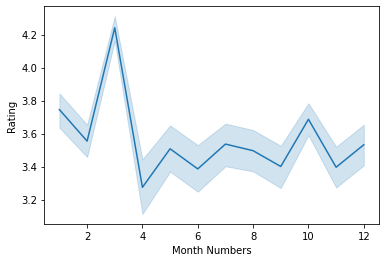

In [112]:
sns.lineplot(x = cleaned_data['Month Numbers'], y = cleaned_data['Rating'])

<AxesSubplot:xlabel='Review Grade', ylabel='Average Rating'>

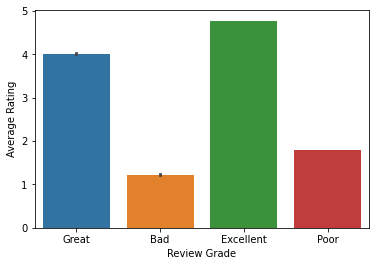

In [113]:
sns.barplot(x=cleaned_data['Review Grade'], y=cleaned_data['Average Rating'])

In [114]:
from nltk.tokenize import word_tokenize

In [115]:
new_status = []

for i in cleaned_data['Status']:
    if i == '[BLANK]':
        new_status.append('NULL')
    elif 'Updated' in i:
        new_status.append('Updated')
    else:
        new_status.append(i)
        
print(len(new_status))

cleaned_data['Status'] = new_status

10916


<ipython-input-115-ee6fe20d630f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Status'] = new_status


In [116]:
cleaned_data.info()
cleaned_data.tail(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 0 to 12466
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row             10916 non-null  int64  
 1   Business Name   10916 non-null  object 
 2   Average Rating  10916 non-null  float64
 3   Review Grade    10916 non-null  object 
 4   Title           10916 non-null  object 
 5   Review          10916 non-null  object 
 6   Rating          10916 non-null  int64  
 7   Time            10916 non-null  object 
 8   Review Count    10916 non-null  int64  
 9   Country         10915 non-null  object 
 10  Status          10916 non-null  object 
 11  Month           10916 non-null  object 
 12  Month Numbers   10916 non-null  int64  
 13  Years           10916 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.5+ MB


,Row,Business Name,Average Rating,Review Grade,Title,Review,Rating,Time,Review Count,Country,Status,Month,Month Numbers,Years
12452,12452,Philippine Airlines,1.4,Bad,They smashed my guitar and refuse to…,They smashed my guitar and refuse to respond m...,1,21-Sep-18,1,HK,NULL,Sep,9,2018
12453,12453,Philippine Airlines,1.4,Bad,WORST AIRLINE EVER FLOWN,Below I'll post the formal complaint email I s...,1,4-Sep-18,6,GB,NULL,Sep,9,2018
12454,12454,Philippine Airlines,1.4,Bad,Good overall experience will use again,Recently used Philippine airlines on my trip t...,4,13-Jul-18,5,GB,NULL,Jul,7,2018
12455,12455,Philippine Airlines,1.4,Bad,Rude check in staff at San Francisco…,Rude check in staff at San Francisco Internati...,1,"Updated Jul 7, 2018",2,US,Updated,Jul,7,2018
12456,12456,Philippine Airlines,1.4,Bad,Customer service is non-existent,Customer service is non-existent. Period.,1,6-Jul-18,1,US,NULL,Jul,7,2018
12457,12457,Philippine Airlines,1.4,Bad,Zero Customer Service and flight…,Zero Customer Service and flight… Zero Custome...,1,30-May-18,9,GB,NULL,May,5,2018
12458,12458,Philippine Airlines,1.4,Bad,2 STAR service airline - Customer does not com...,Looking for 5 STAR status but still with arch...,1,23-May-18,3,GB,NULL,May,5,2018
12459,12459,Philippine Airlines,1.4,Bad,Everything worked out just fine,Everything worked out just fine. Nothing to co...,5,3-May-18,7,DE,NULL,May,5,2018
12460,12460,Philippine Airlines,1.4,Bad,Philippine Airlines - First Class Airline,I haven't flown Philippine Airlines for many y...,5,7-Apr-18,1,GB,NULL,Apr,4,2018
12461,12461,Philippine Airlines,1.4,Bad,Not good.,"I was supposed to fly from London to Denpasar,...",1,"Updated Feb 18, 2018",3,GB,Updated,Feb,2,2018


In [117]:
#df = pd.DataFrame(cleaned_data)
#df.to_csv('cleaned_first_batch.csv')